In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('subbrand_grouped.parquet')

In [3]:
df.dropna(inplace=True)

In [4]:
df['DATE_FIELD'] = pd.to_datetime(df['DATE_FIELD'])
df['YEAR'] = df['DATE_FIELD'].dt.year
df['MONTH'] = df['DATE_FIELD'].dt.month
df['DAY'] = df['DATE_FIELD'].dt.day

In [5]:
X = df[['ITM_SBRND_CD', 'YEAR', 'MONTH', 'DAY']]
y = df['SALES']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
df.dtypes

ITM_SBRND_CD           float64
DATE_FIELD      datetime64[ns]
SALES                  float64
WEEK                     int64
YEAR                     int32
MONTH                    int32
DAY                      int32
dtype: object

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)

In [12]:
mae

19537.462076141

In [13]:
result = pd.DataFrame({'YEAR': X_test['YEAR'],
                       'MONTH': X_test['MONTH'],
                       'DAY': X_test['DAY'],
                       'Actual': y_test,
                       'Predicted': y_pred})

In [14]:
result_by_month = result.groupby(['YEAR', 'MONTH'])[['Actual', 'Predicted']].mean().reset_index()


In [15]:
result_by_month['Date'] = pd.to_datetime(result_by_month['YEAR'].astype(str) + '-' + result_by_month['MONTH'].astype(str), format='%Y-%m')


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


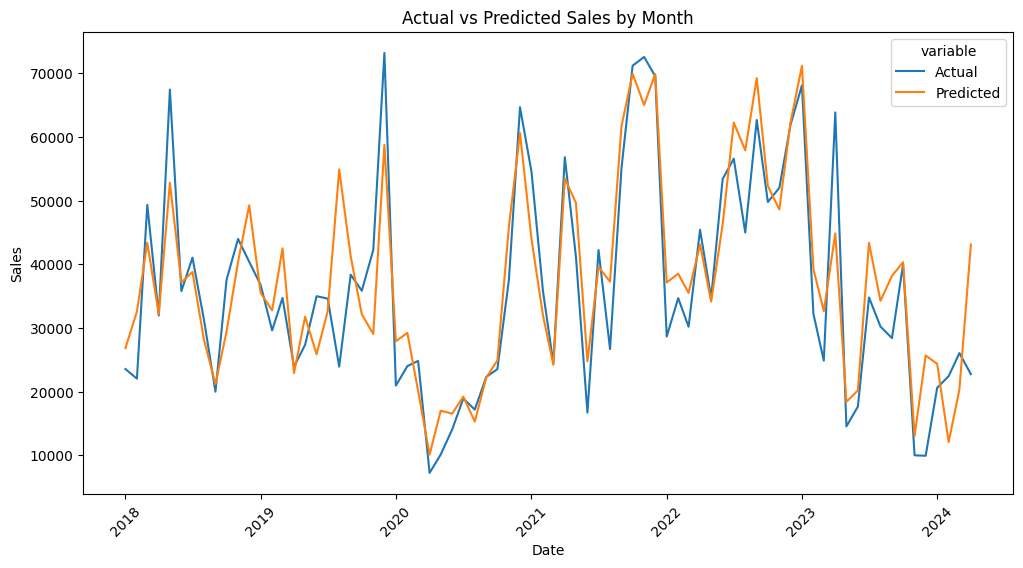

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='value', hue='variable', data=pd.melt(result_by_month, ['Date'], value_vars=['Actual', 'Predicted']))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales by Month')
plt.xticks(rotation=45)
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_percentage_error


In [19]:
y_pred = model.predict(X_test)

In [20]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Mean Absolute Percentage Error (MAPE): 1950687500409684480.00%


In [21]:
from sklearn.metrics import r2_score

In [22]:
y_pred = model.predict(X_test)

In [23]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.6511
